In [74]:
!pip3 install tqdm

You are using pip version 19.0.3, however version 22.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#  Self Study 3

In this self study we perform character recognition using SVM classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0..9 at a resolution of 28x28 pixels. 

Stuff we need:

In [79]:
!pip install tqdm
import matplotlib.pyplot as plt
import tqdm
import os
import numpy as np
np.set_printoptions(linewidth=600)

import time
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
#from sklearn.datasets import fetch

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


Now we get the MNIST data. Using the fetch_mldata function, this will be downloaded from the web, and stored in the directory you specify as data_home (replace my path in the following cell):

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', data_home=os.getcwd())

The data has .data and .target attributes. The following gives us some basic information on the data:

In [3]:
print("Number of datapoints: {}\n".format(mnist.data.shape[0]))
print("Number of features: {}\n".format(mnist.data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist.target)))

Number of datapoints: 70000

Number of features: 784

List of labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']



The mnist.data is represented as a Pandas dataframe (probably -- you may check this via type(mnist.data)). The following code expects mnist.data to be a plain np.array, which we get simply by running:

In [4]:
mnist.data=np.array(mnist.data)

We can plot individual datapoints as follows:

Value of datapoint no. 4:
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 

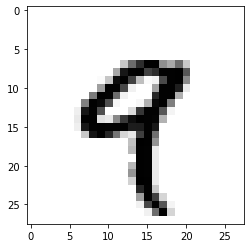

In [9]:
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist.data[index]))
print("As image:\n")
plt.imshow(mnist.data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

The first datapoint now is: 



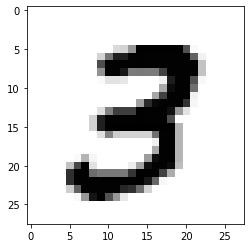

7        3
10       3
12       3
15       7
27       3
        ..
69975    3
69979    7
69986    3
69990    7
69996    3
Name: class, Length: 14434, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [10]:
digit0='3'
digit1='7'
mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print(mnist_bin_target)

**Exercise 1 [SVM]:** Split the mnist_bin data into training and test set. Learn different SVM models by varying the kernel functions (SVM). For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. 

You can get the current time using:

`import time` <br>
`now = time.time()`

*Caution*: for some configurations, learning here can take a little while (several minutes).

Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br>
`misclass = np.where(test != predictions)` <br>
Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 

How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels. What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

In [12]:
# Training and testing on binary classification task first
X_train, X_test, y_train, y_test = train_test_split(mnist_bin_data, mnist_bin_target, 
                                                    test_size=.30, random_state=0)


### RBF
- good results fast
### Linear
- good results fast
### Sigmoid
- good results, slow

Poly time = linear time
RBF time a bit slower than Poly time
Sigmoid slowest

Choice: Linear and Poly

In [13]:
model = SVC(kernel='linear')
now = time.time()
model.fit(X_train, y_train)
end = time.time()
print(f'Linear Kernel')
print(f'Duration elapsed {(end - now):.2f} seconds')
print(f'Accuracy on training set: {model.score(X_train, y_train):.2f}')
print(f'Accuracy on test set: {model.score(X_test, y_test):.2f}')

Linear Kernel
Duration elapsed 2.70 seconds
Accuracy on training set: 1.00
Accuracy on test set: 0.98


In [14]:
# Poly Kernel / binary 3 and 7
model = SVC(kernel='rbf')
now = time.time()
model.fit(X_train, y_train)
end = time.time()
print('Polynomial Kernel')
print(f'Duration elapsed {(end - now):.2f} seconds')
print(f'Accuracy on training set: {model.score(X_train, y_train):.2f}')
print(f'Accuracy on test set: {model.score(X_test, y_test):.2f}')

Polynomial Kernel
Duration elapsed 2.97 seconds
Accuracy on training set: 1.00
Accuracy on test set: 0.99


## Whole dataset evaluation with Poly and Linear

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target)
# model_poly = SVC(kernel='poly')
# model_linear = SVC(kernel='linear')

# model_poly.fit(X_train, y_train)
# model_linear.fit(X_train, y_train)

# poly_pred_train = model_poly.pred(X_train)
# poly_pred_test = model_poly.pred(X_test)

# linear_pred_train = model_linear.pred(X_train)
# linear_pred_test = model_linear.pred(X_test)

In [ ]:
# print("Confusion matrix Poly test set\n")
# print(confusion_matrix(y_test, poly_pred_test))

In [ ]:
# print("Confusion matrix Linear test set\n")
# print(confusion_matrix(y_test, linear_pred_test))

###  We want to be strict about whether certain pixels is on/of with a limit. E.g. all the pixels with value below 60 will be colorued as white and the rest is as black. We get rid of the shadowing.

### We want to use the sharpen kernel that is

\begin{array}{cc} 
0 & -1 & 0 \\
-1 & 5  & -1 \\
0 & -1 & 0
\end{array}

we will iterate over the original photo and apply this 

In [119]:
def transform_binary(image, limit):
    f = lambda x: 1 if x>=limit else 0
    img = list(map(f, image))
    return img

def prepare_data(X_train, X_test):
    X_train_map, X_test_map = [], []
    for i in tqdm.tqdm(range(X_train.shape[0]), desc='Training', unit='mapped images'):
        new_img = transform_binary(X_train[i], 150)
        X_train_map.append(new_img)
    
    for i in tqdm.tqdm(range(X_test.shape[0]), desc='Testing', unit='mapped images'):
        new_img = transform_binary(X_test[i], 150)
        X_test_map.append(new_img)
    return X_train_map, X_test_map

In [120]:
import tqdm as tqdm

X_train, X_test, y_train, y_test = train_test_split(mnist_bin_data, mnist_bin_target, test_size=.30, random_state=0)

new_X_train, new_X_test = prepare_data(X_train, X_test)

Testing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4331/4331 [00:00<00:00, 8135.58mapped images/s]


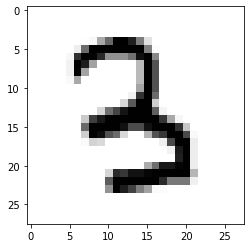

In [116]:
plt.imshow(X_train[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()


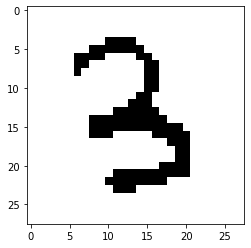

In [114]:
new_X_train = np.array(new_X_train)
plt.imshow(new_X_train[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()


In [121]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3)

new_X_train, new_X_test = prepare_data(X_train, X_test)

Testing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21000/21000 [00:02<00:00, 7114.37mapped images/s]


In [122]:
model = SVC(kernel='linear')
now = time.time()
model.fit(new_X_train, y_train)
end = time.time()
print(f'Linear Kernel')
print(f'Duration elapsed {(end - now):.2f} seconds')
print(f'Accuracy on training set: {model.score(new_X_train, y_train):.2f}')
print(f'Accuracy on test set: {model.score(new_X_test, y_test):.2f}')

Linear Kernel
Duration elapsed 1263.47 seconds
Accuracy on training set: 0.97
Accuracy on test set: 0.92


### Results of the above

Linear Kernel
Duration elapsed 1263.47 seconds
Accuracy on training set: 0.97
Accuracy on test set: 0.92

**Exercise 2 [SVM]:** Consider how the current data representation "presents" the digits to the classifiers, and try to improve this:<br>

**a)** Manually design feature functions for which you expect that based on your new features SVM classifiers can achieve a better accuracy than with the original features. Transform the data into your new feature space, and learn new classifiers. What accuracies do you get?

**b)** Instead of designing an explicit feature mapping as in **a)**, define a suitable measure of similarity for the digits, and implement that measure as a kernel function. (Optional: verify that the function you have defined actually satisfies the positive-semidefiniteness property.) Use your kernel function as a custom kernel for the SVC classifier.  See http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py for an example.